In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import timeit
import ciw
import collections
import seaborn as sbr
import pandas as pd

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ambulance_game as abg

In [2]:
# Tikz picture here

# Single run simulation

In [3]:
# Simulation Parameters
lambda_a = 0.15       # Ambulance: 6 arrivals per hour
lambda_o = 0.2       # Others: 3 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None      # ciw.seed value

In [4]:
records = abg.models.simulate_model(lambda_a, lambda_o, mu, total_capacity, threshold, seed_num).get_all_records()
blocks = [b.time_blocked for b in records]
waits = [w.waiting_time for w in records]
print(np.mean(blocks), np.mean(waits))

73.7494511315704 0.3875297023453673


# Results of multiple simulations

In [5]:
# Multiple runs parameters
warm_up_time = 100
num_of_trials = 3
output_type = "tuple"
seed_num = None

In [6]:
res = abg.models.get_multiple_runs_results(lambda_a, lambda_o, mu, total_capacity, threshold, seed_num, warm_up_time, num_of_trials, output_type)

mean_wait = np.mean([np.mean(w) for w in res])
mean_wait

27.721968528978255

# Timing Experiment 1

In [7]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.05      # Others: 3 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients

# Timing Experiment parameters
num_of_trials = 10      # Number of trials to be considered
repetition = 5           # Repetition of each trial
method = "Simulation"     # Method to be used (only Simulation available)
filename = "None"

In [8]:
times = abg.time_for_different_number_of_trials(lambda_a, lambda_o, mu, total_capacity, threshold, num_of_trials, repetition, method, filename)

In [10]:
# Old Files: Trials_500_rep_15, Trials_1000_rep_20
# New Files:

# times = abg.old_import_trials_duration(path='Trials/Trials_343_rep_50.txt')
times = abg.import_trials_duration(path='Trials/Random_File.csv')

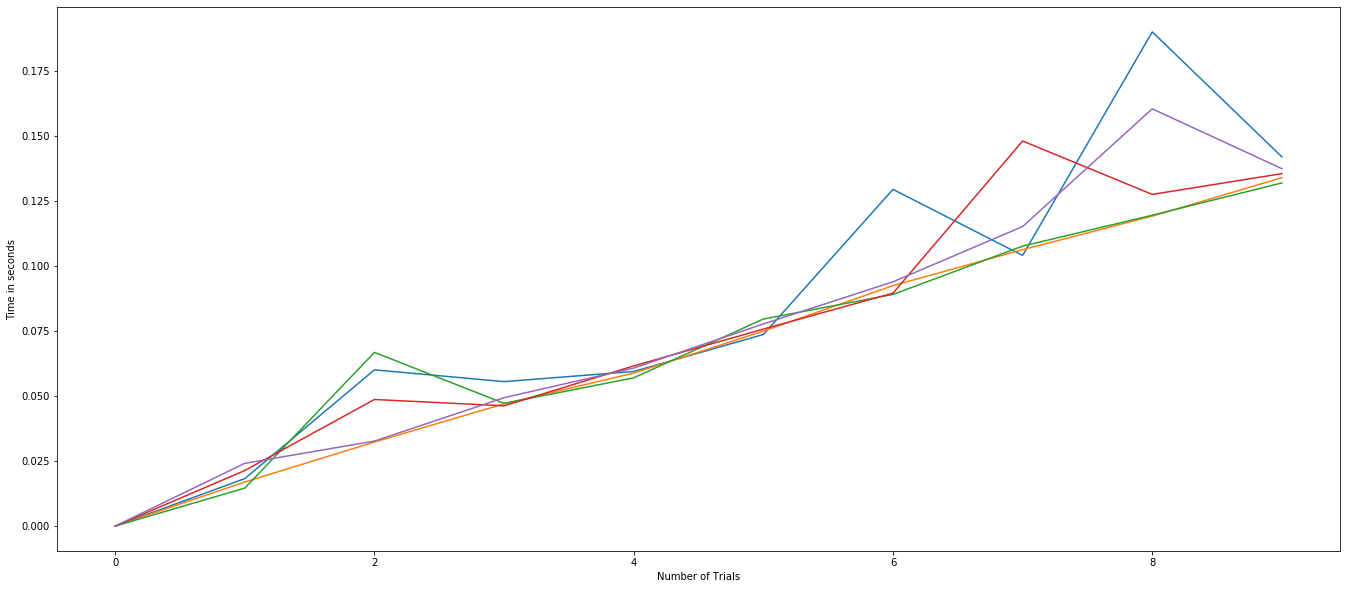

In [12]:
abg.get_all_lines_plot(times)
plt.show()

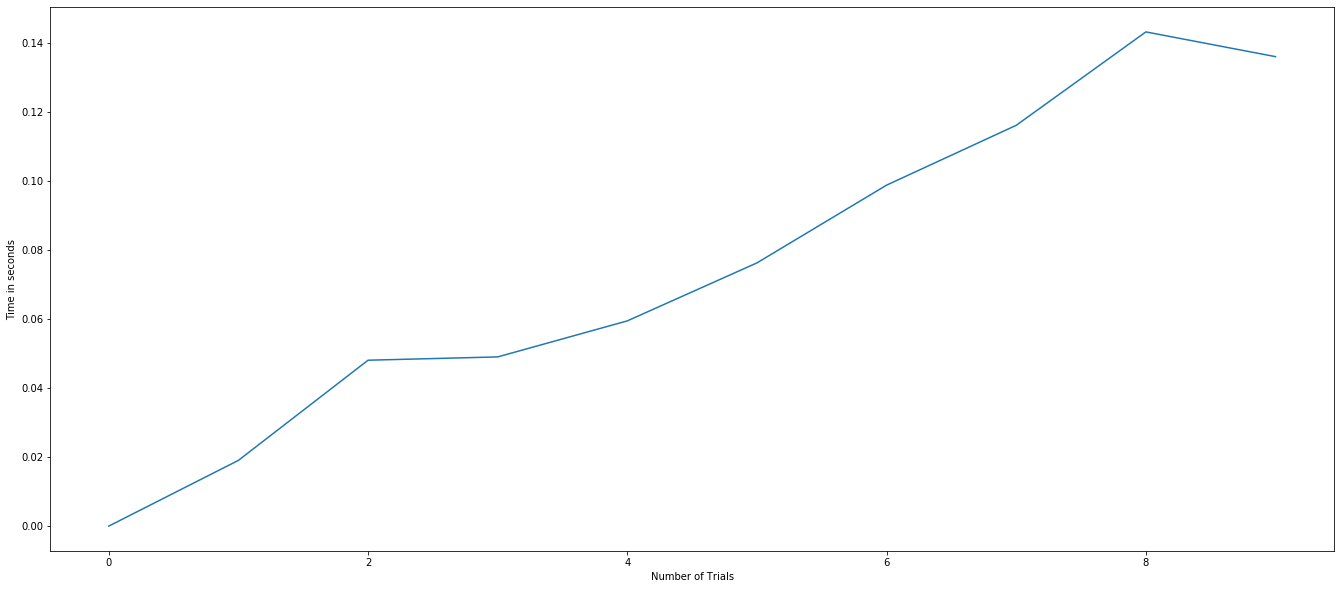

In [13]:
abg.get_mean_plot(times)
plt.show()

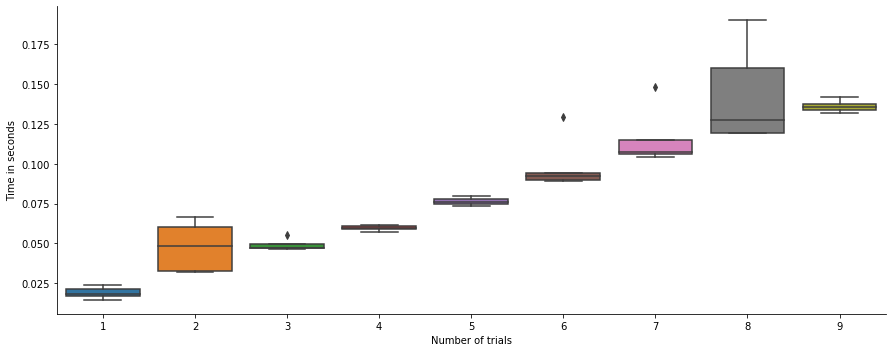

In [14]:
abg.get_distribution_plot(times, kind="box")
plt.show()

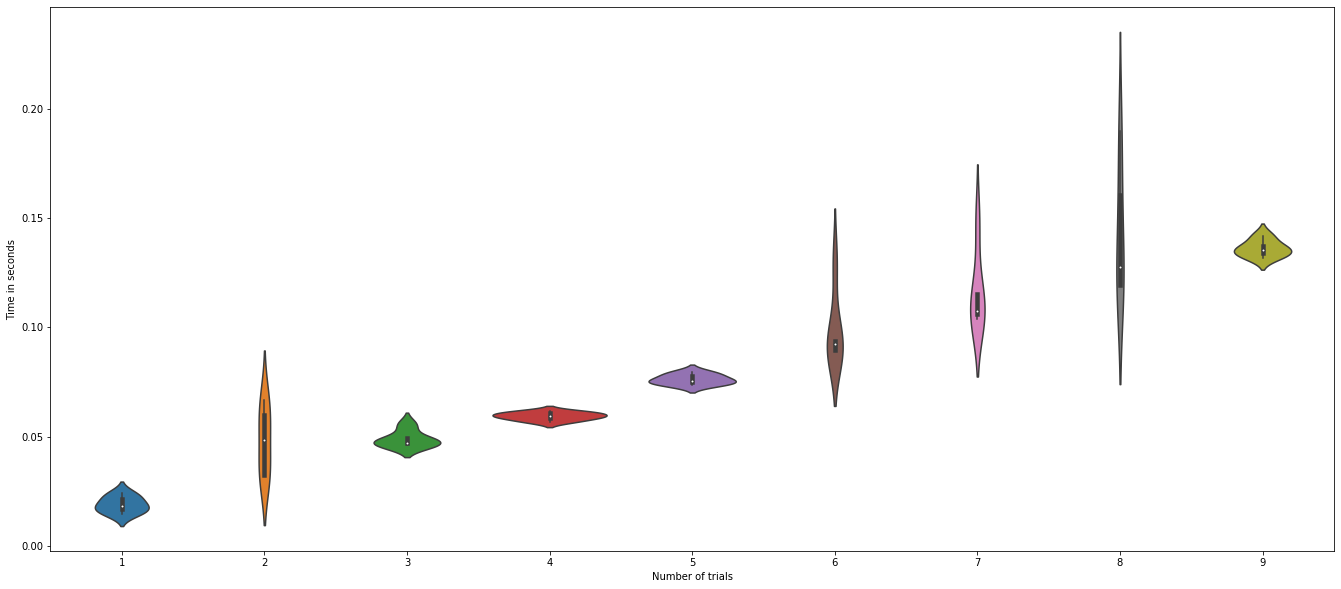

In [15]:
abg.get_distribution_plot(times, kind="violin")
plt.show()

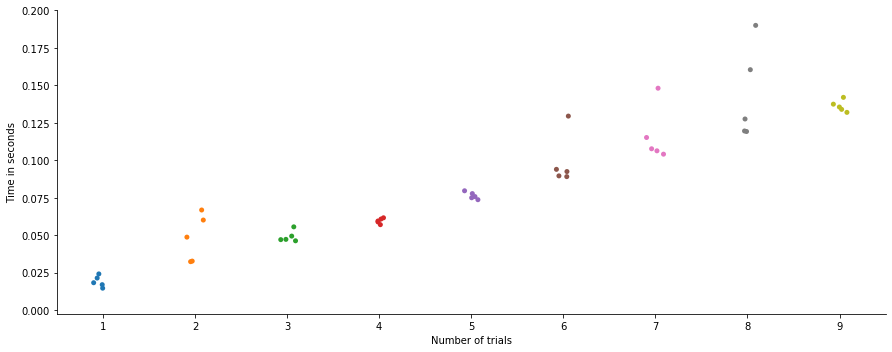

In [16]:
abg.get_distribution_plot(times)
plt.show()

# Timing Experiment 2 - Investigate convergence of times

In [5]:
# Queueing Parameters
lambda_a = 0.15      # Ambulance: 9 arrivals per hour
lambda_o = 0.2       # Others: 12 arrivals per hour
mu = 0.05            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
threshold = 4        # Threshold of accepting ambulance patients
seed_num = None
warm_up_time = 100
output_type = "list"

# Timing Parameters
num_of_trials = 20

In [6]:
time_results = abg.models.get_multiple_runs_results(lambda_a, lambda_o, mu, total_capacity, threshold, seed_num, warm_up_time, num_of_trials, output_type)

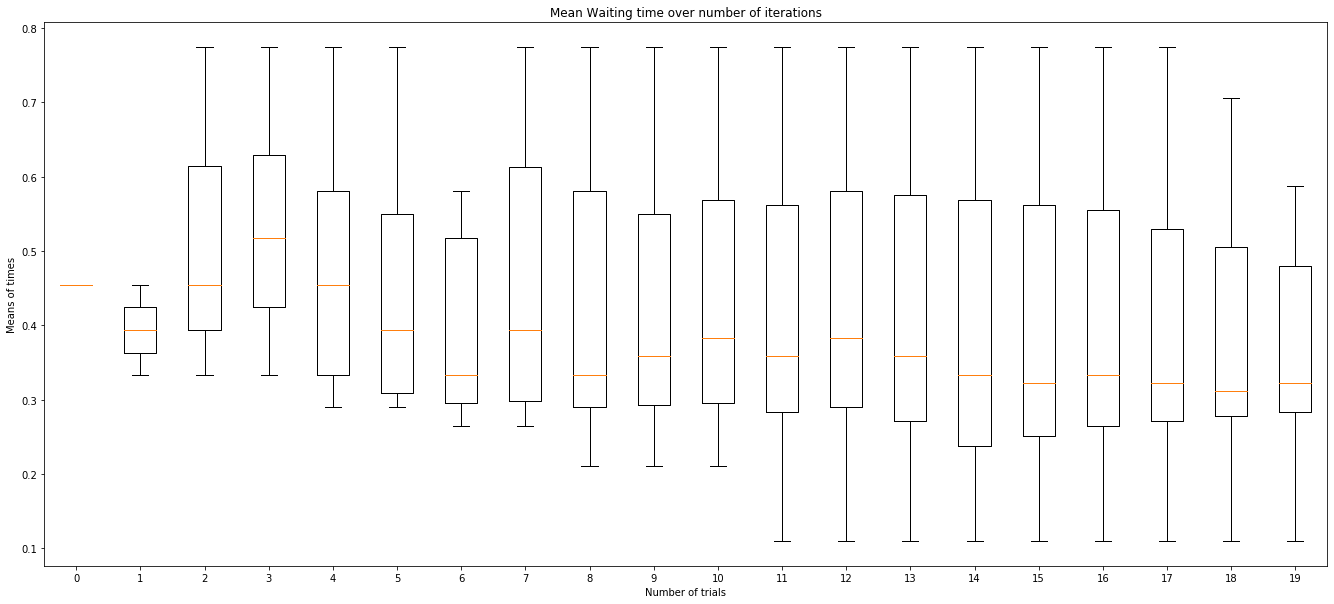

In [7]:
abg.make_plot_of_confidence_intervals(time_results, time_type="w")
plt.show()

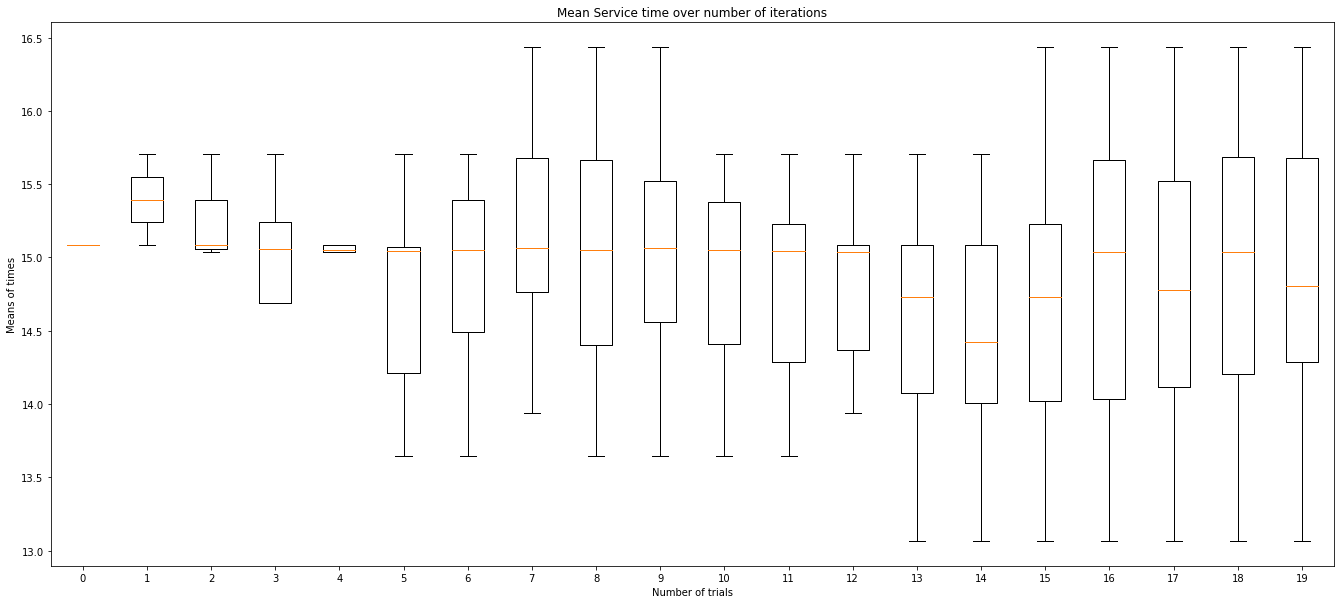

In [8]:
abg.make_plot_of_confidence_intervals(time_results, time_type="s")
plt.show()

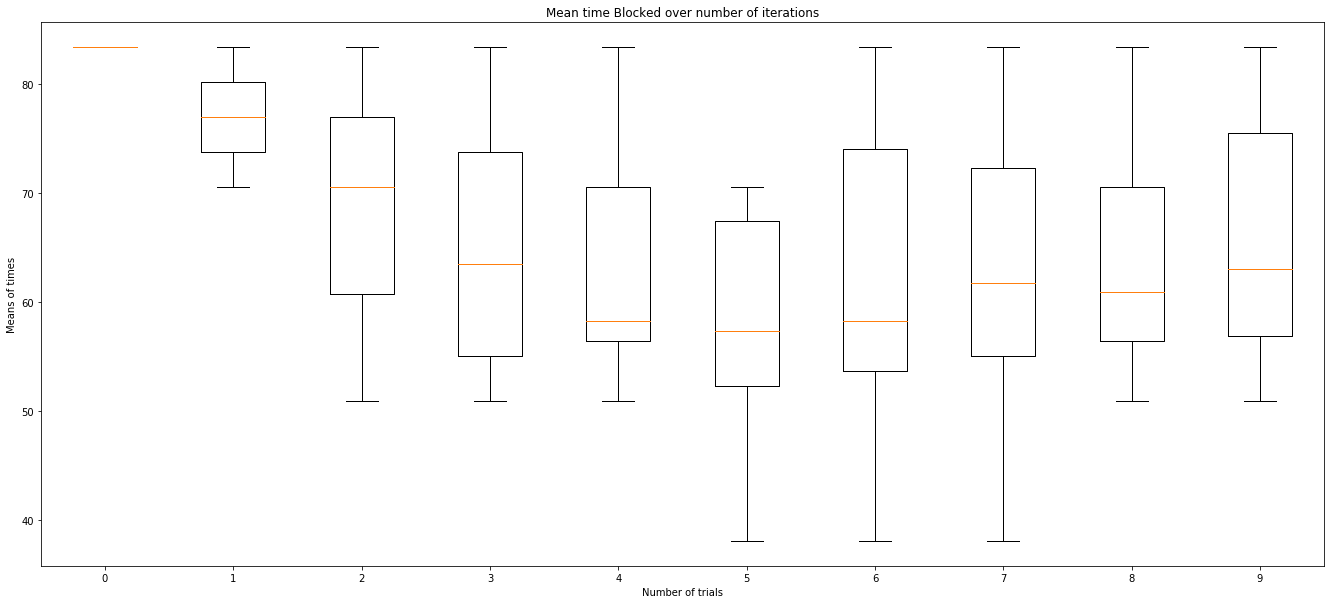

In [21]:
abg.make_plot_of_confidence_intervals(time_results, time_type="b")
plt.show()

# Model plot 1 - Plots for different thresholds

In [22]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.05      # Others: 3 arrivals per hour
mu = 0.02            # Service time: 3 services per hour
total_capacity = 8   # Number of servers: 8 servers
seed_num = 3

# Plot Parameters
measurement_type = "both"      # The measurement to be plotted ["w":waiting times, "b":blocking times, otherwise: both]
plot_function = np.mean     # The function to be plotted [np.sum or np.mean]

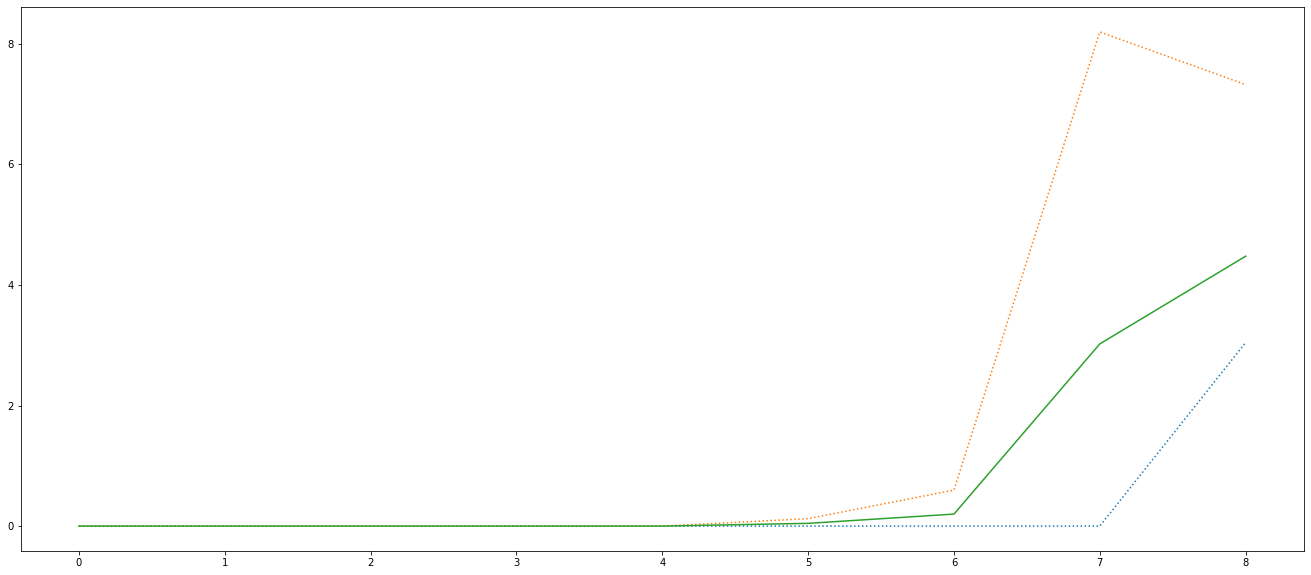

In [23]:
abg.make_plot_for_different_thresholds(lambda_a, lambda_o, mu, total_capacity, seed_num, "w", np.mean)
plt.show()

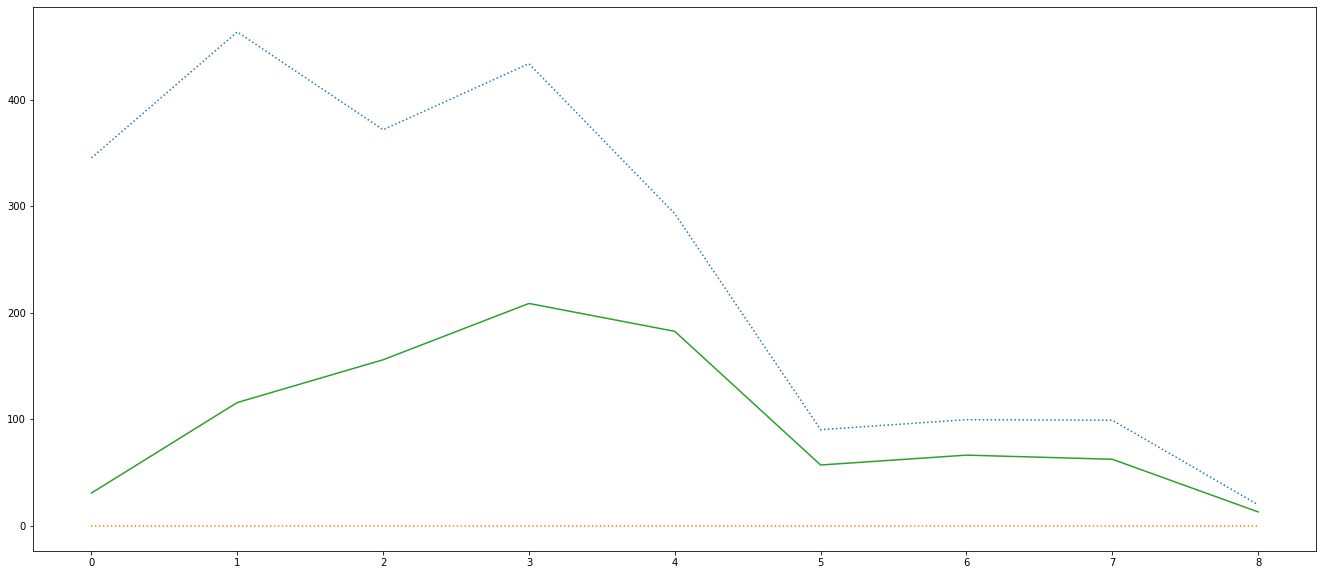

In [24]:
abg.make_plot_for_different_thresholds(lambda_a, lambda_o, mu, total_capacity, seed_num, "b", np.mean)
plt.show()

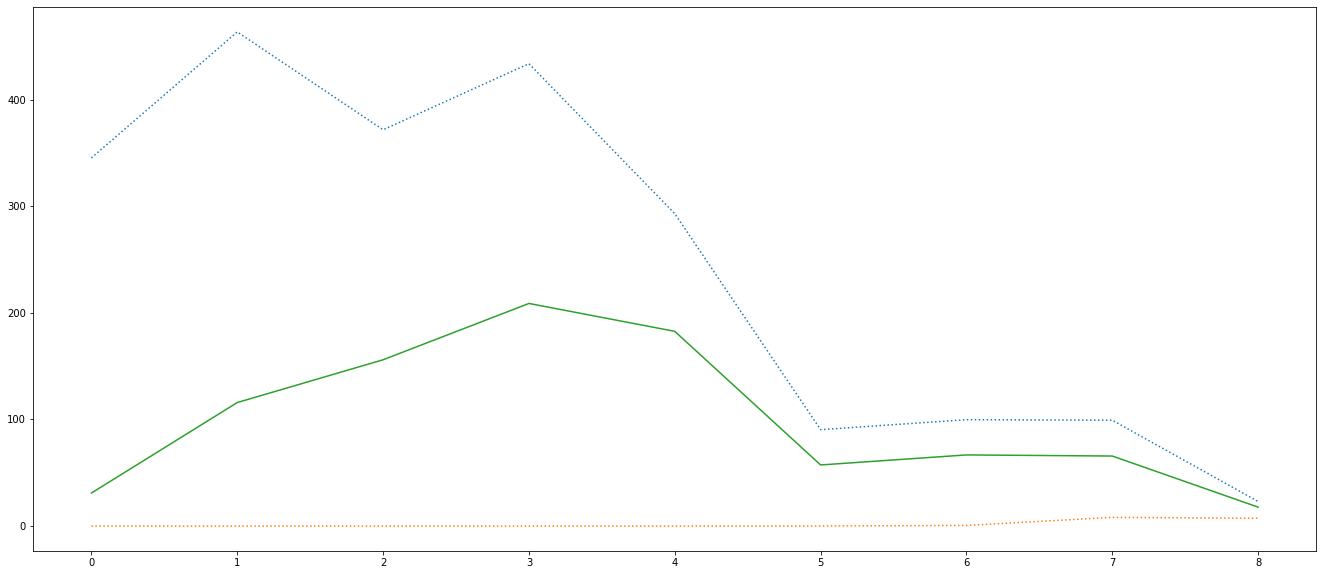

In [25]:
abg.make_plot_for_different_thresholds(lambda_a, lambda_o, mu, total_capacity, seed_num, "both", np.mean)
plt.show()

# Model plot 2 - Plots of proportion within time limit

In [30]:
# Queueing Parameters
lambda_a = 0.1       # Ambulance: 6 arrivals per hour
lambda_o = 0.08      # Others: 4.8 arrivals per hour
mu = 0.03            # Service time: 1.8 services per hour
total_capacity = 6   # Number of servers: 6 servers
seed_num = None

# Plot Parameters
target = 4

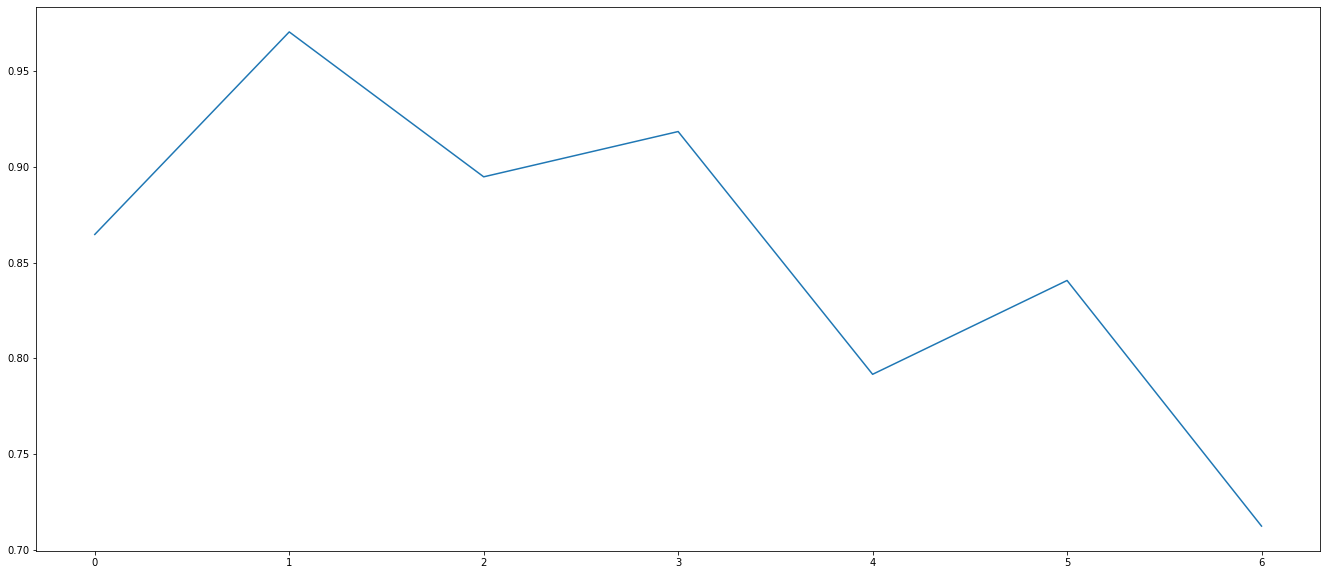

In [31]:
props = abg.make_proportion_plot(lambda_a, lambda_o, mu, total_capacity, seed_num, target)

# Model plot 3 - Plot between two hospitals

In [2]:
lambda_a = 0.15       # Ambulance: 6 arrivals per hour

# Hospital 1 Parameters
lambda_o_1 = 0.08      # Others: 4.8 arrivals per hour
mu_1 = 0.03            # Service time: 1.8 services per hour
total_capacity_1 = 6   # Number of servers: 6 servers
threshold_1 = 3

# Hospital 2 Parameters
lambda_o_2 = 0.08
mu_2 = 0.03
total_capacity_2 = 6
threshold_2 = 3

# Plot Parameters
seed_num_1 = 1
seed_num_2 = 1
warm_up_time = 100
num_of_trials = 10
accuracy = 12

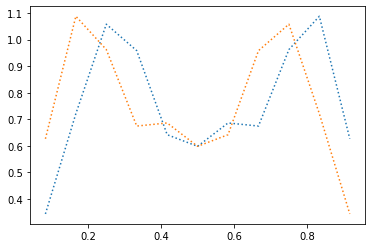

In [3]:
abg.make_plot_two_hospitals_arrival_split(lambda_a, lambda_o_1, lambda_o_2, mu_1, mu_2, total_capacity_1, total_capacity_2, threshold_1, threshold_2, "w", seed_num_1, seed_num_2, warm_up_time, num_of_trials, accuracy)
plt.show()

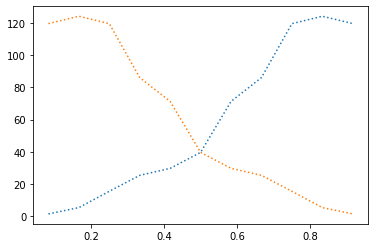

In [4]:
abg.make_plot_two_hospitals_arrival_split(lambda_a, lambda_o_1, lambda_o_2, mu_1, mu_2, total_capacity_1, total_capacity_2, threshold_1, threshold_2, "b", seed_num_1, seed_num_2, warm_up_time, num_of_trials, accuracy)
plt.show()

# Examples for testing

In [170]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

290
1089.854729732795
0.0


In [171]:
ciw.seed(5)
Q = ciw.Simulation(build_model(1, 1, 2, 1), node_class=build_custom_node(7))

Q.simulate_until_max_time(100)
records = Q.get_all_records()
waits = [r.waiting_time for r in records]
blocks = [r.time_blocked for r in records]

print(len(records))
print(sum(waits))
print(sum(blocks))

290
1040.318433783405
52.00679633745028


In [172]:
sim_results = []
for i in range(10):
    simulation = simulate_model(0.15, 0.2, 0.05, 8, 4, i)
    sim_results.append(len(simulation.get_all_records()))

In [173]:
sim_results

[699, 719, 759, 715, 703, 719, 695, 685, 775, 719]

# Dummy Cells

In [1]:
print('Hi')

Hi
